Some would argue Geospatial analysis didn't come into being until computers were available, I would argue otherwise. Note I'm not using the term GIS in this context, because it's too broad and ambiguous. John Snow is credited as the father of modern Epidemiology (not the Game of Thrones character), could arguably also be the grandfather of geospatial analysis. In 1854 John Snow was investigating a cholera outbreak in Soho, London. To do this he plotted death locations on a map and discovered a trend, everything was near the broad street pump. At the time the widely help belief was the disease was transmitted via "foul air", John disagreed and thought it was due to contaminated water and his map helped him prove it. Today we still have John's original map and data; so why not replicate his study using more modern tools.


“Everything is related to everything else, but near things are more related than distant things.” ~ Tobler’s First Law of Geography

First we must begin by importing our python packages. If you're not sure how to do this, here's a site that explains it rather well:  [Installing Python modules with pip](https://programminghistorian.org/lessons/installing-python-modules-pip). And also note that I'm using Python 3.6, so certian parts with the code will be imcompatible with Python 2. 

Here's Dr. Snow's original map, if you'd like to read more into his work go checkout this [wikipedia article](https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak)

![Snow's original Map](images/SnowsMap.svg)

In [1]:
import geopandas as gp 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
import shapely

Next we need to get our data, the data I'm using can be downloaded here [data](www.rtwilson.com/downloads/SnowGIS_v2.zip)

In [2]:
cholera=gp.read_file("SnowGIS_SHP/Cholera_Deaths.shp")
pumps=gp.read_file('SnowGIS_SHP/Pumps.shp')
# Note that Geopandas is very flexible when it comes to accepting data types, it can read GeoJSON, ESRI Shapefiles and KML
# to name a few. 

To paraphase on of my stats professors- "Before you do anything, always plot your data". So that's exactly what we're going to do. Right now I'm not going to spent much time worrying about analysis or cartographic design, all I want to do is get a fell for the data.  

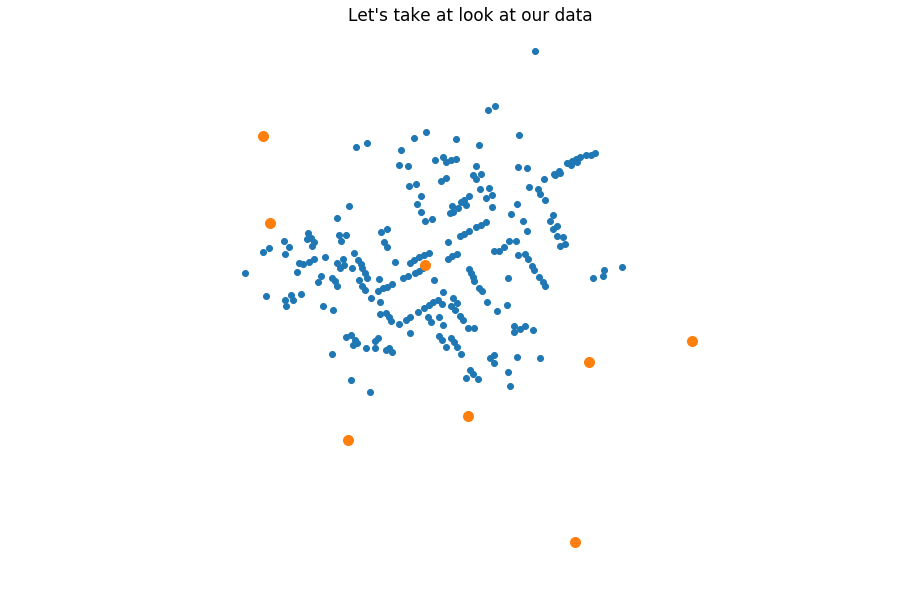

In [3]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title("Let's take at look at our data" , fontsize=17)
ax.set_axis_off()
plt.axis('equal')
cholera.plot(ax=ax)
pumps.plot(ax=ax, markersize=100)
plt.show()

One of my favorite functions in Pandas is actually the .head() function, it lets you return 5 rows any dataframe. It's import to actually look at your data, that way you'll know the field names, get a guess at the data types (string, float, int...) and see if there's anything awry (lots of null values, mixed datatypes, random gibberish, unknowns, insane numbers, all the values read 666 or kitten infestation).  

In [4]:
cholera.head()

,Id,Count,geometry
0,0,3,POINT (529308.7414200425 181031.3515464273)
1,0,2,POINT (529312.163571333 181025.1724011325)
2,0,1,POINT (529314.3824294576 181020.2936884186)
3,0,1,POINT (529317.3796448297 181014.2587706869)
4,0,4,POINT (529320.6754489439 181007.8716281414)


In [5]:
pumps.head()

,Id,geometry
0,0,POINT (529396.5393954368 181025.0630474603)
1,0,POINT (529192.5378675429 181079.391379651)
2,0,POINT (529183.7397662739 181193.7350126951)
3,0,POINT (529748.9110886676 180924.2072511902)
4,0,POINT (529613.205238149 180896.8041211955)


So it would seem that we don't know the pump names. Now that we know a little bit more about our data why not make the same plot we did before, but this time let's make the marker size depend upon the death count. To do this I'm going to create a new field in the GeoDataFrame. 

In [6]:
cholera['markersize']= cholera['Count']*15

What I'm going to do here is create a map in which the marker size is dependent upon the death count. This is just to help us get a feel for our data. 

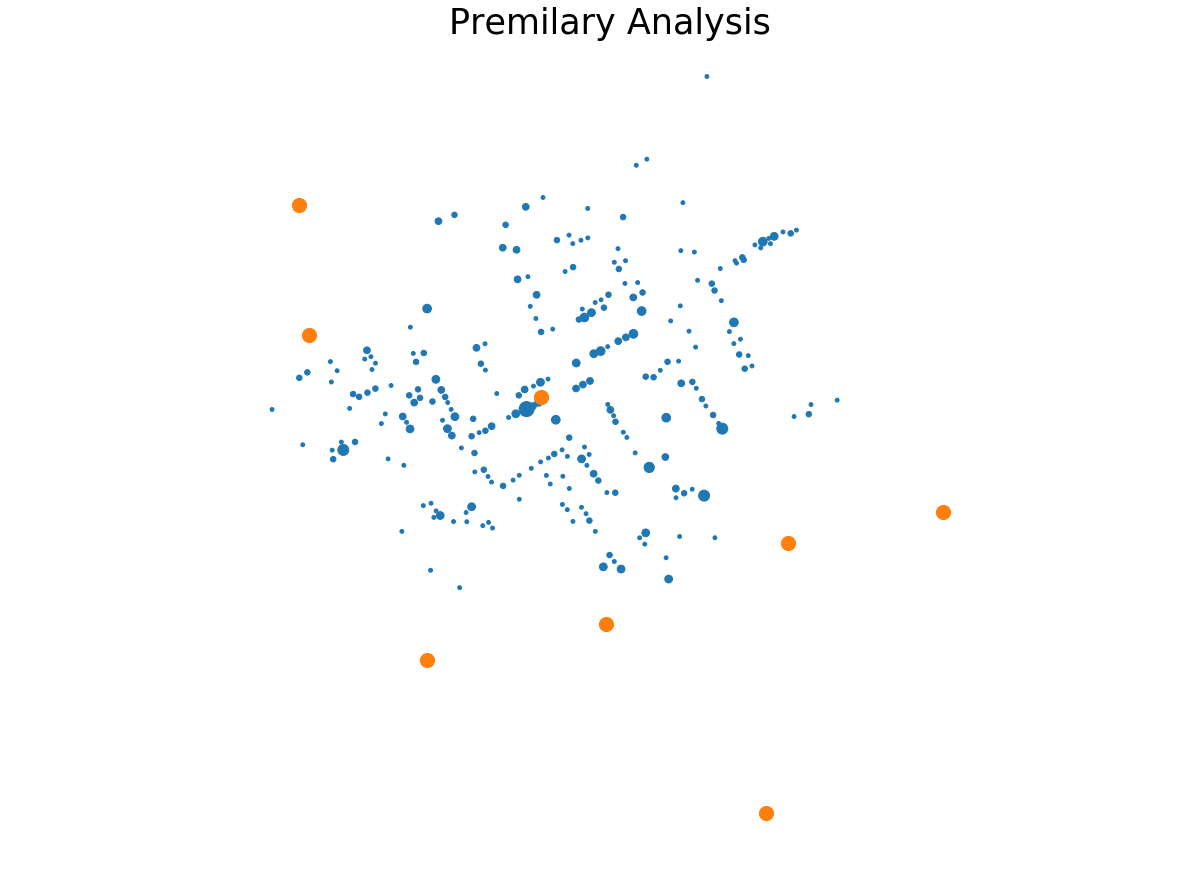

In [7]:
f, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("Premilary Analysis" , fontsize=35)
ax.set_axis_off()
plt.axis('equal')
cholera.plot(ax=ax, markersize= cholera['markersize'])
pumps.plot(ax=ax, markersize=200)
plt.show()

I went ahead and did some work in QGIS 

![image](/assets/images/vor_pip.svg)

![image](/assets/images/heat_map.svg)

